In [10]:
!pip install --upgrade nbformat

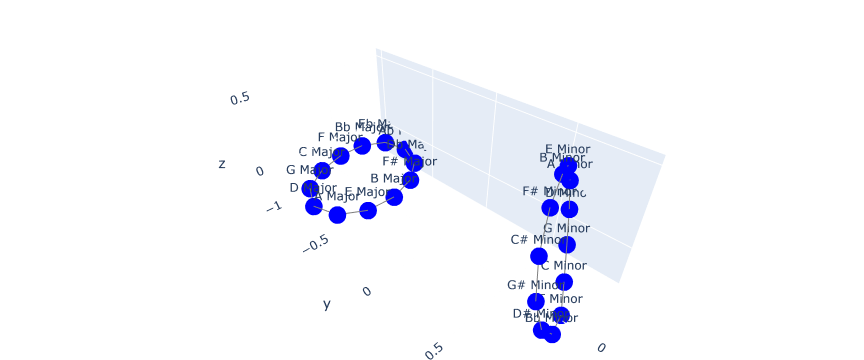

In [2]:
import networkx as nx
import plotly.graph_objects as go

# Step 1: Create a graph structure to represent chords and harmonics
G = nx.Graph()

# Define chords for the Circle of Fifths (Major and Minor)
circle_of_fifths_major = ["C Major", "G Major", "D Major", "A Major", "E Major", "B Major", "F# Major", "Db Major", "Ab Major", "Eb Major", "Bb Major", "F Major"]
circle_of_fifths_minor = ["A Minor", "E Minor", "B Minor", "F# Minor", "C# Minor", "G# Minor", "D# Minor", "Bb Minor", "F Minor", "C Minor", "G Minor", "D Minor"]

# Define the I-IV-V relationships for major chords
I_IV_V_major = {
    "C Major": ("F Major", "G Major"),
    "G Major": ("C Major", "D Major"),
    "D Major": ("G Major", "A Major"),
    "A Major": ("D Major", "E Major"),
    "E Major": ("A Major", "B Major"),
    "B Major": ("E Major", "F# Major"),
    "F# Major": ("B Major", "Db Major"),
    "Db Major": ("F# Major", "Ab Major"),
    "Ab Major": ("Db Major", "Eb Major"),
    "Eb Major": ("Ab Major", "Bb Major"),
    "Bb Major": ("Eb Major", "F Major"),
    "F Major": ("Bb Major", "C Major")
}

# Define the I-IV-V relationships for minor chords
I_IV_V_minor = {
    "A Minor": ("D Minor", "E Minor"),
    "E Minor": ("A Minor", "B Minor"),
    "B Minor": ("E Minor", "F# Minor"),
    "F# Minor": ("B Minor", "C# Minor"),
    "C# Minor": ("F# Minor", "G# Minor"),
    "G# Minor": ("C# Minor", "D# Minor"),
    "D# Minor": ("G# Minor", "Bb Minor"),
    "Bb Minor": ("D# Minor", "F Minor"),
    "F Minor": ("Bb Minor", "C Minor"),
    "C Minor": ("F Minor", "G Minor"),
    "G Minor": ("C Minor", "D Minor"),
    "D Minor": ("G Minor", "A Minor")
}

# Step 2: Add chords and harmonic relationships to the graph
# Add Circle of Fifths (Major)
for i in range(len(circle_of_fifths_major)):
    G.add_edge(circle_of_fifths_major[i], circle_of_fifths_major[(i + 1) % len(circle_of_fifths_major)])

# Add Circle of Fifths (Minor)
for i in range(len(circle_of_fifths_minor)):
    G.add_edge(circle_of_fifths_minor[i], circle_of_fifths_minor[(i + 1) % len(circle_of_fifths_minor)])

# Add I-IV-V relationships (Major)
for chord, (IV, V) in I_IV_V_major.items():
    G.add_edge(chord, IV)
    G.add_edge(chord, V)

# Add I-IV-V relationships (Minor)
for chord, (IV, V) in I_IV_V_minor.items():
    G.add_edge(chord, IV)
    G.add_edge(chord, V)

# Step 3: Get 3D positions for each node using a spring layout
pos = nx.spring_layout(G, dim=3)

# Extract node positions for 3D visualization
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
z_nodes = [pos[node][2] for node in G.nodes()]

# Extract edge positions for 3D visualization
x_edges = []
y_edges = []
z_edges = []
for edge in G.edges():
    x_edges += [pos[edge[0]][0], pos[edge[1]][0], None]
    y_edges += [pos[edge[0]][1], pos[edge[1]][1], None]
    z_edges += [pos[edge[0]][2], pos[edge[1]][2], None]

# Step 4: Create the 3D plot with plotly
edge_trace = go.Scatter3d(
    x=x_edges, y=y_edges, z=z_edges,
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers+text',
    marker=dict(symbol='circle', size=10, color='blue'),
    text=list(G.nodes()),
    hoverinfo='text'
)

# Step 5: Create and display the 3D figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="3D Visualization of Harmonics - Circle of Fifths and I-IV-V",
    scene=dict(
        xaxis=dict(showbackground=True),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=False
)

fig.show()
